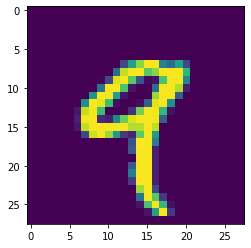

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


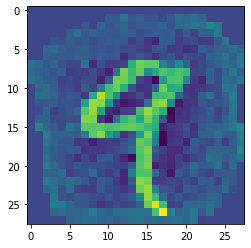

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


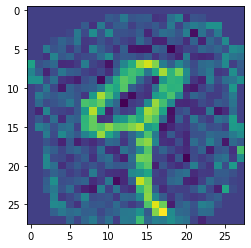

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


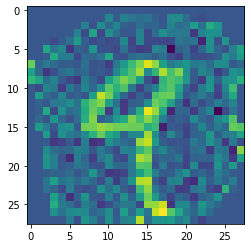

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


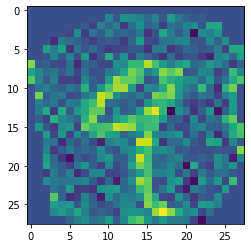

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


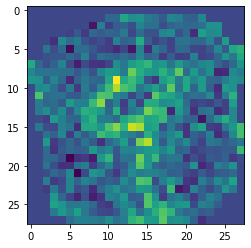

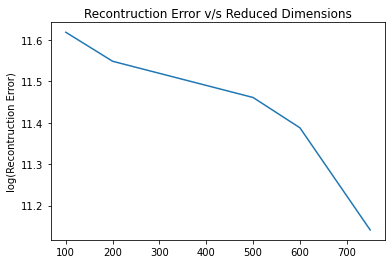

In [ ]:
!pip install mnist
import mnist
import math
import numpy as np
import numpy.linalg as linalg
from numpy import linalg as LA
import matplotlib.pyplot as plt

def PCA(dataset,n):
  m = dataset.shape[0]
  d= dataset.shape[1]

  if m>=d:
    A = np.dot(dataset.T, dataset)
    eigenValues, eigenVectors = linalg.eig(A)
    idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx][0:n]
    eigenVectors = eigenVectors.T[idx][0:n]
    return eigenVectors.T
  else:
    A = np.dot(dataset,dataset.T)
    eigenValues, eigenVectors = linalg.eig(A)
    idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx][0:n]
    eigenVectors = eigenVectors.T[idx][0:n]
    modifiedVectors = []
    for i in range(n):
      modifiedVectors.append(np.dot(eigenVectors[i],dataset)/LA.norm(np.dot(eigenVectors[i],dataset)))
    eigenVectors= np.array(modifiedVectors)
    return eigenVectors.T
    

train_imgs=mnist.train_images()[0:4000]

#Flattening the images
train_imgs=train_imgs.reshape((-1,784))
imgplot = plt.imshow(train_imgs[4].reshape(28,28))
plt.show()
dim = [750,600,500,200,100]
distortion = []
for d in dim:
  U = PCA(train_imgs,d)
  print(U)
  project_imgs = np.dot(train_imgs,U)
  reconstruct_imgs= np.dot(project_imgs,U.T)
  distortion.append(math.log(LA.norm(train_imgs-reconstruct_imgs)))
  imgplot = plt.imshow(reconstruct_imgs[4].reshape(28,28))
  plt.show()

plt.plot(dim,distortion)
plt.title('Recontruction Error v/s Reduced Dimensions')
plt.ylabel('log(Recontruction Error)')
plt.xlabel('')
plt.show()






